In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy import sqrt
import pandas as pd
import scipy.constants as const
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties import unumpy as unp 
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray

Tabelle erstellen:

In [2]:
dscan = pd.read_csv('tables/detektorscan.txt', delim_whitespace= "\t")
# print(dscan)
print(dscan.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 theta &      I \\
\midrule
 -0,30 &   1836 \\
 -0,29 &   2122 \\
 -0,28 &   2236 \\
 -0,27 &   2418 \\
 -0,26 &   2579 \\
 -0,25 &   2644 \\
 -0,24 &   3160 \\
 -0,23 &   3646 \\
 -0,22 &   4368 \\
 -0,21 &   4898 \\
 -0,20 &   5479 \\
 -0,19 &   6142 \\
 -0,18 &   6781 \\
 -0,17 &   7939 \\
 -0,16 &   9296 \\
 -0,15 &  11164 \\
 -0,14 &  13036 \\
 -0,13 &  15916 \\
 -0,12 &  20495 \\
 -0,11 &  26592 \\
 -0,10 &  34614 \\
 -0,09 &  45569 \\
 -0,08 &  60869 \\
 -0,07 &  92128 \\
 -0,06 & 141444 \\
 -0,05 & 198646 \\
 -0,04 & 249182 \\
 -0,03 & 318370 \\
 -0,02 & 392259 \\
 -0,01 & 456486 \\
  0,00 & 506208 \\
  0,01 & 505924 \\
  0,02 & 445386 \\
  0,03 & 351661 \\
  0,04 & 252666 \\
  0,05 & 175980 \\
  0,06 & 124592 \\
  0,07 &  98877 \\
  0,08 &  69837 \\
  0,09 &  52169 \\
  0,10 &  36003 \\
  0,11 &  27611 \\
  0,12 &  22698 \\
  0,13 &  19287 \\
  0,14 &  17893 \\
  0,15 &  13613 \\
  0,16 &  11112 \\
  0,17 &   8819 \\
  0,18 &   6282 \\
  0,19 &   

Daten auswerten:

[-0.03614097  0.00107415  0.08579305  0.01873827]
(4.34+/-0.06)e+04 (9.5+/-1.9)e+03 -0.0361+/-0.0005 0.0011+/-0.0005
[5013]
[4481.06936103] [5544.78163454]
[-0.0424441] [0.04243221]
[0.0848763]
[488878.09151147]


(-0.32, 0.32)

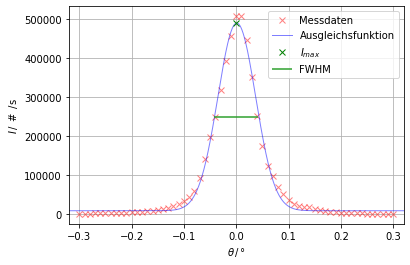

In [6]:
theta, I = np.genfromtxt('tables/detektorscan.txt', unpack=True, skip_header=1)
Imax = np.amax(I)
Inorm = I/Imax

# plt.figure(figsize=(14, 10))              # Größe des Plots

plt.plot(theta, I, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)

n = len(theta)                              #the number of data
mean = sum(theta*Inorm)/n                       #note this correction
sigma0 = np.sqrt(sum(Inorm*(theta - mean)**2))

# Ausgleichsrechung nach Gaußverteilung
def g(theta, sigma, mu, a, b):
    # return (a/np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(theta-mu)**2/(2* sigma**2)) + b 
    return a * np.exp(-(theta-mu)**2/(2* sigma**2)) + b 

para, pcov = curve_fit(g, theta, Inorm)#, p0=[sigma0,mean,1,1])
sigma, mu, a, b = para
pcov = np.sqrt(np.diag(pcov))
fsigma, fmu, fa, fb = pcov
usigma = ufloat(sigma, fsigma)
umu = ufloat(mu, fmu)
ua = ufloat(a, fa) 
ub = ufloat(b, fb)

print(para)
print(ua*Imax, ub*Imax, usigma, umu)

xx = np.linspace(-0.4, 0.4, 10**4)
plt.plot(xx, g(xx, *para)*Imax, '-b', linewidth = 1, label = 'Ausgleichsfunktion', alpha=0.5)

gauss = g(xx, *para)*Imax
peak, _ = find_peaks(gauss)
print(peak)

results_half = peak_widths(gauss, peak, rel_height=0.5)
w, h, l, r = results_half
print(l, r)
s = 0.4
l = s * l/(peak) -s
r = s * r/(peak) -s
print(l, r)
print(r-l)
print(gauss[peak])
plt.plot(0, gauss[peak], "gx", label = '$I_{max}$')
plt.hlines(h, l, r, color="C2", label='FWHM')

plt.xlabel(r'$\theta \, / \, \mathrm{°}$')
plt.ylabel(r'$I \, / \,$ # $\, / \mathrm{s}$')
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(-0.32, 0.32)
# plt.ylim(-0.05, 1.05)

Fehler berechnen:

In [ ]:
ua = ufloat(a, fa) 
print('T = (%.3f ± %.3f)' % (noms(ua), stds(ua)))

T = (0.086 ± 0.001)


Plot erstellen:

In [ ]:

plt.plot(f, Uc, 'xr', markersize=6 , label = 'Messdaten', alpha=0.5)
xx = np.linspace(100, 150000, 10**4)
plt.plot(xx, g(xx, a), '-b', linewidth = 1, label = 'Ausgleichsfunktion')

plt.xlabel(r'$f \, / \, \mathrm{Hz}$')
plt.ylabel(r'$A(\omega) \, / \, U_0$')
plt.xscale('log')                       # axis scale 
plt.legend(loc="best")                  # legend position
plt.grid(True)                          # grid style
plt.xlim(200, 150000)                   # limitation of visible scale in plot

NameError: name 'f' is not defined